<div class="alert alert-danger">

In future sessions, we will cover the importance of using three distinct datasets: training, validation, and test. However, for this assignment, we will conduct all calculations using a single dataset, even though this approach is fundamentally flawed.

</div>

# Data pre-processing with SciKit-Learn Pipelines

All data science projects require a certain level of data cleaning and pre-processing to train machine learning models. Such tasks are time-consuming task and usually tedious.


## Pipelines

Machine learning pipelines consist of the ordered sequence of steps needed to train a machine learning model. They are an easy option to automate a machine learning workflow. Pipelines can involve pre-processing, feature selection, classification/regression, and post-processing. However, in this notebook, we focus on the pre-processing steps.

## Exercise 1

In the following link, you can download a dataset that contains information about the Titanic passengers.

https://raw.githubusercontent.com/jnin/information-systems/main/data/titanic.csv


The data are presented in a csv format. The dataset contains, among others, the following attributes:

|Variable	|Definition	|Key|
|---------|------------|-----------------|
|survival	|Survival	|0 = No, 1 = Yes|
|pclass	|Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex	|Sex| female male	|
|Age	|Age |in years	|
|sibsp	|# of siblings | spouses aboard the Titanic	|
|parch	|# of parents/children  |parents/children aboard the Titanic	|
|ticket	|Ticket number	||
|fare	|Passenger fare	||
|cabin	|Cabin number	||
|embarked	|Port of Embarkation|	C = Cherbourg, Q = Queenstown, S = Southampton|

<div class="alert alert-info"><b>Exercise 1.1</b> 

Create a dataframe called ```df``` that contains the provided data. Then decide with is target variable and drop from ```df``` statistically non-relevant attributes.
</div>

In [8]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Francois Schoonbee\Documents\Na-Graads\ESADE\AI_1\titanic.csv')
df


,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Embarked
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,S
...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",male,27.0,0,0,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,S
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,C


<div class="alert alert-info"><b>Exercise 1.2</b> 

Extract the features matrix and target array from ```df``` and store them in two new variables called ```X```and ```y```, respectively.
</div>

In [11]:
# YOUR CODE HERE
y = df[['Survived']]
X = df.drop(columns=['Ticket','Fare','Cabin','Name','Survived','PassengerId'])
X

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S
...,...,...,...,...,...,...
886,2,male,27.0,0,0,S
887,1,female,19.0,0,0,S
888,3,female,NaN,1,2,S
889,1,male,26.0,0,0,C


<div class="alert alert-info"><b>Exercise 1.3</b> 
Before moving forward, it is a good practice to plot the information and think about the data. 
</div>

<div class="alert alert-block alert-warning">
Remember that plotting in python is not part of this subject. The next cell is just for illustration purposes. Execute it and extract some knowledge about the data.
</div>

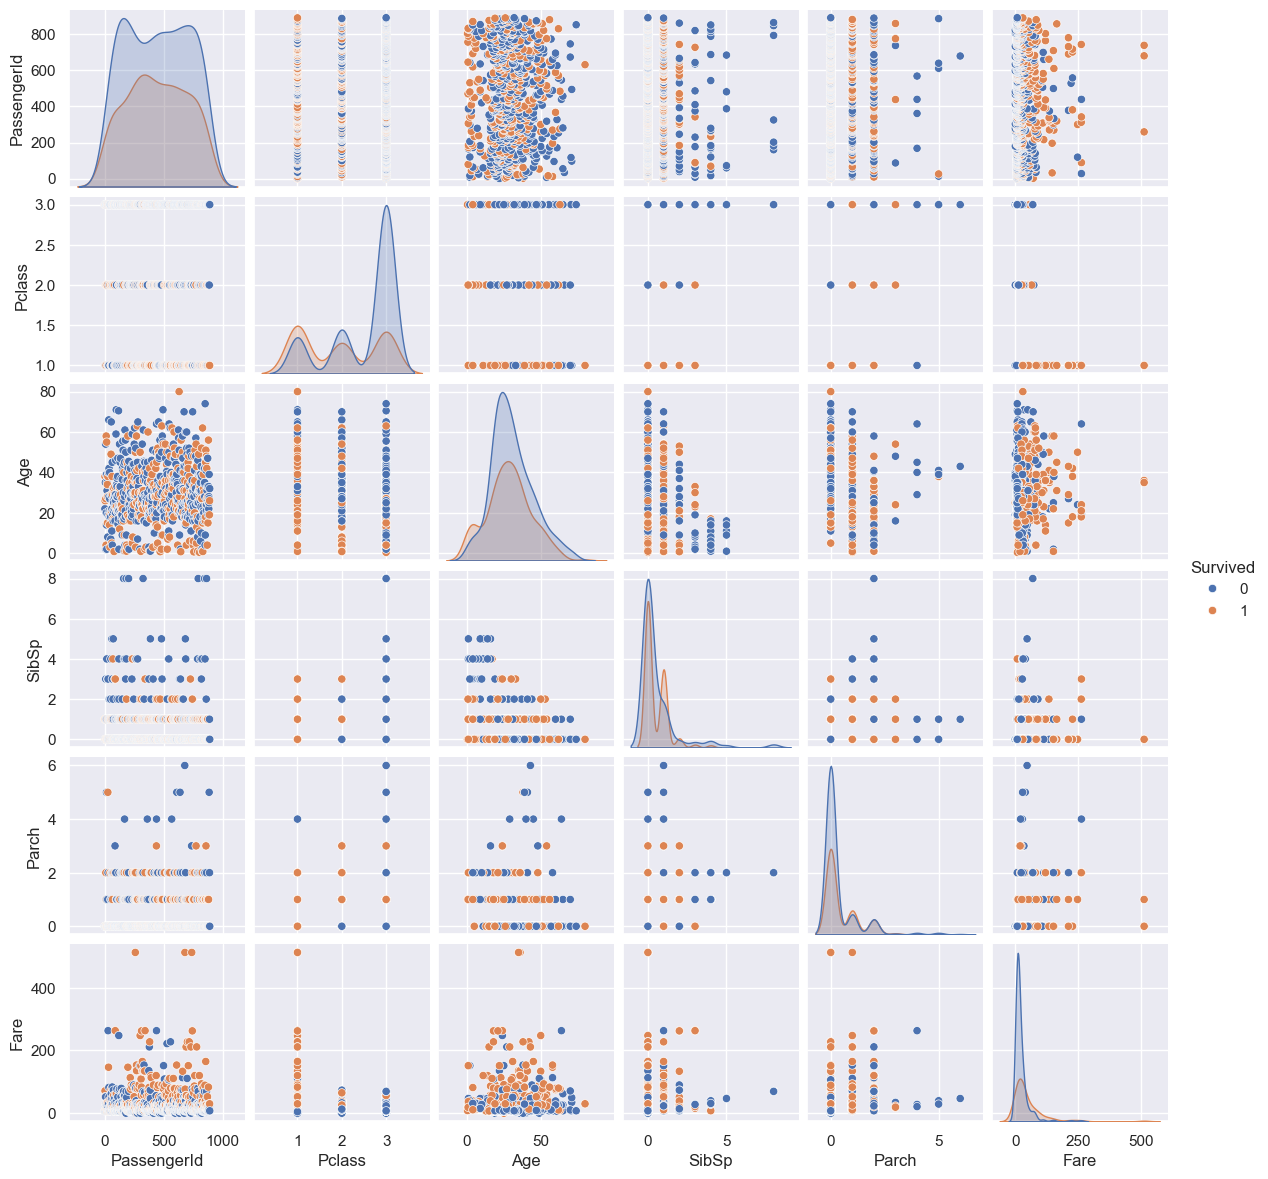

In [12]:
%matplotlib inline
import seaborn as sns
sns.set()
sns.pairplot(df, hue='Survived', height=2)

<div class="alert alert-info"><b>Exercise 1.4</b> 
Now, let's do a simple sanity check about the data: verify if the dataset contains missing values. Write the code carry on this checking
</div>

<div class="alert alert-block alert-warning">
    
To this aim, you can use the Pandas method ```isna()``` together with an appropriate aggregation function. 
</div>

In [23]:
# YOUR CODE HERE
X.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

<div class="alert alert-info"><b>Exercise 1.5</b> 
    
Data pre-processing steps are different if attributes are categorical or numerical. Before continuing, identify each attribute type and define two lists called ```categorical_features``` and ```numerical_features``` to store their column names.
</div>

In [25]:
# YOUR CODE HERE
X
categorical_features = ['Pclass','Sex','Embarked']
numerical_features = ['Age','SibSp','Parch']

<div class="alert alert-info"><b>Exercise 1.6</b> 
    
Think about the required pre-processing steps for each attribute or group of attributes. Then write down a possible workflow to be implemented using Scikit-learn column transformers, be concrete with the step order.
</div>

<div class="alert alert-block alert-warning">
    
Remember that Scikit-learn executes columns transformers steps in parallel. If you want to ensure a concrete order, you need to create an inner pipeline inside the transformer.
</div>



<img src="https://raw.githubusercontent.com/jnin/information-systems/main/figures/transformer.png" alt="Cross Validation" style="width: 800px;"/>

<div class="alert alert-info"><b>Exercise 1.7</b> 
    
Write the code for your column transformer, do not include further steps as data normalization or model fitting. 
    
</div>

<div class="alert alert-block alert-warning">

Remember, you can nest a Scikit-learn pipeline inside a column transformer object.
    
</div>

<div class="alert alert-block alert-warning">

Also, remember, steps are defined as tuples containing two or three elements depending on if the step applies to all attributes or only some of them.
    
</div>

<div class="alert alert-block alert-warning">

Be clever using the remainder parameter. It allows you to ignore or drop useless attributes.
    
</div>

In [ ]:
# YOUR CODE HERE

<div class="alert alert-info"><b>Exercise 1.8</b> 
    
Once the pre-processing steps are in place. Write the code to use Scikit-learn pipelines to complete the model training process. You can select any model. Do not about its parameters; we will cover this part next week.
</div>

<div class="alert alert-block alert-warning">

Do not include the accuracy calculation. We will do it later on.

</div>

In [ ]:
# YOUR CODE HERE

<div class="alert alert-info"><b>Exercise 1.9</b> 
    
Finally, Write the code to compute the accuracy of your model. Think in couples if the score you got is good or bad and if you trust it.
    
</div>

In [ ]:
# YOUR CODE HERE

<div class="alert alert-danger">
    
**Bonus track:**
    
Repeat the same exercise but with other datasets. Here we provide some datasets to practice:
    
* https://raw.githubusercontent.com/jnin/information-systems/main/data/mortgages.csv (binary classification task)
* https://raw.githubusercontent.com/jnin/information-systems/main/data/NYTreePoints_clean.csv (binary classification task)
* https://raw.githubusercontent.com/jnin/information-systems/main/data/Automobile_data.csv (Regression task)
    
The target variable in all cases is located in the last column.

</div>